In [7]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")



In [8]:
# 2. Simulate Sample Data (Replace this with your real dataset)
# Features: GPA, Attendance Rate, Age, Financial Aid (1/0), Family Support (1/0)
np.random.seed(42)
num_samples = 1000

df = pd.DataFrame({
    'GPA': np.round(np.random.normal(2.5, 0.7, num_samples), 2),
    'Attendance': np.random.randint(50, 100, num_samples),
    'Age': np.random.randint(18, 30, num_samples),
    'Financial_Aid': np.random.randint(0, 2, num_samples),
    'Family_Support': np.random.randint(0, 2, num_samples),
    'Dropout': np.random.choice([0, 1], size=num_samples, p=[0.75, 0.25])
})

# Clip GPA to valid range
df['GPA'] = df['GPA'].clip(0, 4.0)

df.head()


,GPA,Attendance,Age,Financial_Aid,Family_Support,Dropout
0,2.85,93,21,0,0,0
1,2.40,98,29,0,0,0
2,2.95,89,26,1,1,1
3,3.57,60,21,1,1,0
4,2.34,52,18,1,1,0


In [9]:
# 3. Data Preprocessing
X = df.drop("Dropout", axis=1)
y = df["Dropout"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# 4. Train Classifier (Random Forest or Logistic Regression)

# Uncomment one:
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       145
           1       0.08      0.02      0.03        55

    accuracy                           0.67       200
   macro avg       0.39      0.47      0.42       200
weighted avg       0.54      0.67      0.59       200



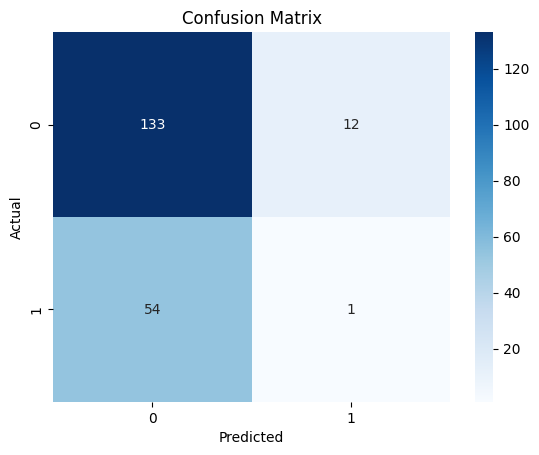

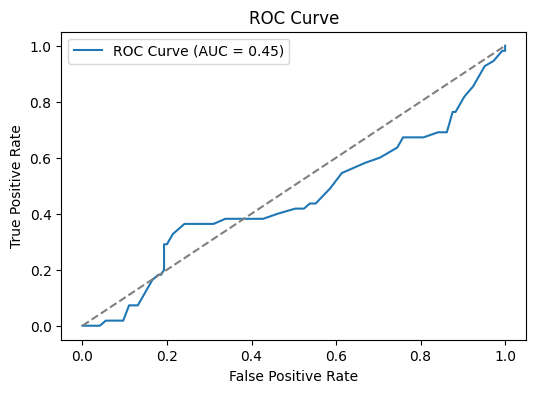

In [11]:
# 5. Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


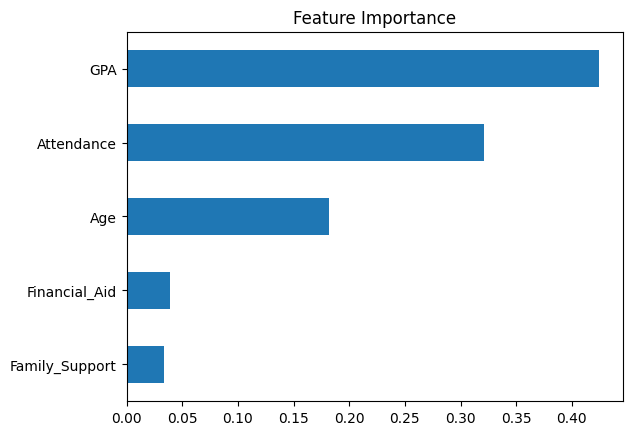

In [12]:
# 6. Feature Importance (Random Forest Only)
if isinstance(model, RandomForestClassifier):
    importances = model.feature_importances_
    feat_importance = pd.Series(importances, index=X.columns)
    feat_importance.sort_values().plot(kind='barh', title='Feature Importance')
    plt.show()


In [14]:


# Save model and scaler
joblib.dump(model, 'dropout_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']